  CUST_ID  BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  \
0  C10001           0.818182      95.40   201.802084        1000.0   
1  C10002           0.909091       0.00  4103.032597        7000.0   
2  C10003           1.000000     773.17   622.066742        7500.0   
3  C10004           0.636364    1499.00     0.000000        7500.0   
4  C10005           1.000000      16.00   678.334763        1200.0   
5  C10006           1.000000    1333.28  1400.057770        1800.0   
6  C10007           1.000000    7091.01  6354.314328       13500.0   
7  C10008           1.000000     436.20   679.065082        2300.0   
8  C10009           1.000000     861.49   688.278568        7000.0   
9  C10010           0.545455    1281.60  1164.770591       11000.0   

   CASH_ADVANCE  
0      0.000000  
1   6442.945483  
2      0.000000  
3    205.788017  
4      0.000000  
5      0.000000  
6      0.000000  
7      0.000000  
8      0.000000  
9      0.000000  


<class 'pandas.core.frame.Dat

<ipython-input-22-d385ce4c3aed>:25: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


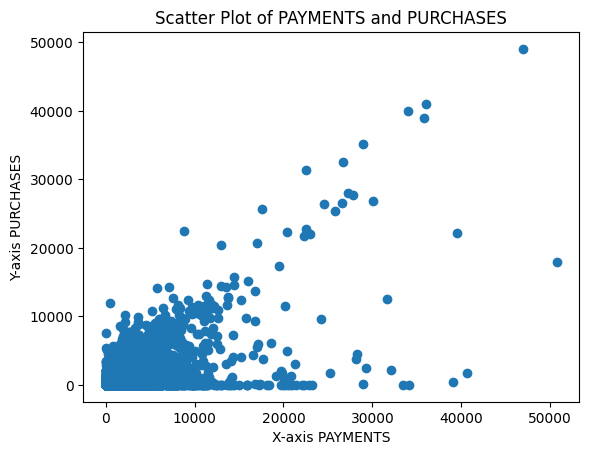

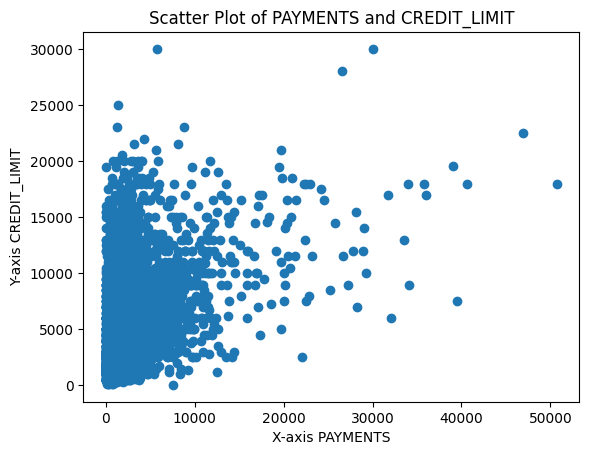

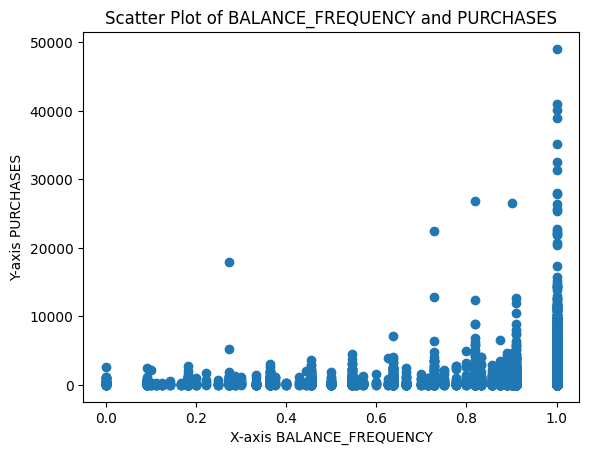

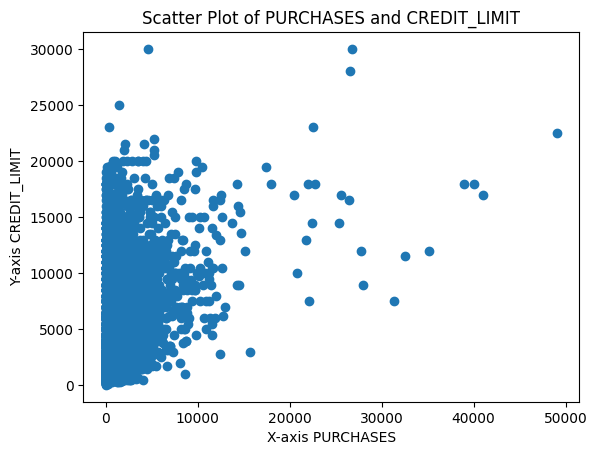

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-22-d385ce4c3aed>:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kmeans['KMeans_Cluster'] = kmeans_clusters


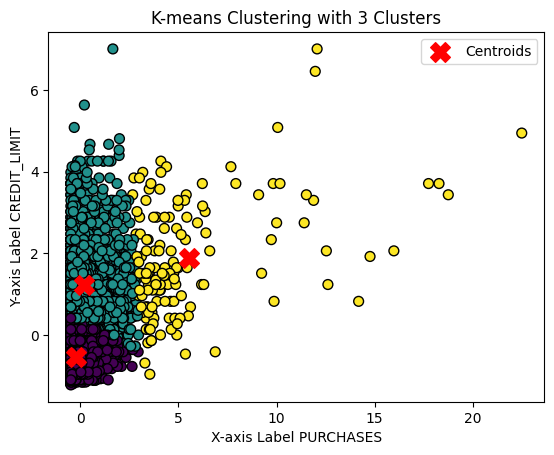

In [ ]:
#1. Load the dataset
import pandas as pd
#read  the dataset
data = pd.read_csv('/content/Credit_card_dataset.csv')

#2. Display the general information about the dataset
print(data.head(10))
print('\n')
print(data.info())
print('\n')
print(data.describe(include='all'))
print('\n')

#3. Missing values
missing_columns = data.columns[data.isnull().any()]
print("Columns with missing values:", missing_columns)
# Count the number of missing values in each column
missing_values = data.isnull().sum()
# Print the result
print("Missing values in each column:")
print(missing_values)
print('\n')

# Replace missing values with the median of each column
data.fillna(data.median(), inplace=True)

#display the change
missing_values = data.isnull().sum()
# Print the result
print("Missing values in each column:")
print(missing_values)
print('\n')

#4. Duplicate rows
duplicate_rows = data[data.duplicated()]
# Display duplicate rows
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)
# Check for any duplicate rows
if data.duplicated().any():
   print("\nThere are duplicate rows in the DataFrame.")
else:
   print("\nNo duplicate rows found.")
print('\n')

#5. Rescaling outliers
# Calculate the first and third quartiles (Q1 and Q3)
Q1 = data['PAYMENTS'].quantile(0.25)
Q3 = data['PAYMENTS'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define a lower bound and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['PAYMENTS'] < lower_bound) | (data['PAYMENTS'] > upper_bound)]

# Display the outliers
print("\nOutliers:")
print(outliers)

#6.Data Visualization
import matplotlib.pyplot as plt


# Create a scatter plot
plt.scatter(data['PAYMENTS'], data['PURCHASES'])
# Add labels and title
plt.xlabel('X-axis PAYMENTS')
plt.ylabel('Y-axis PURCHASES')
plt.title('Scatter Plot of PAYMENTS and PURCHASES')
# Show the plot
plt.show()

# Create a scatter plot
plt.scatter(data['PAYMENTS'], data['CREDIT_LIMIT'])
# Add labels and title
plt.xlabel('X-axis PAYMENTS')
plt.ylabel('Y-axis CREDIT_LIMIT')
plt.title('Scatter Plot of PAYMENTS and CREDIT_LIMIT')
# Show the plot
plt.show()

# Create a scatter plot
plt.scatter(data['BALANCE_FREQUENCY'], data['PURCHASES'])
# Add labels and title
plt.xlabel('X-axis BALANCE_FREQUENCY')
plt.ylabel('Y-axis PURCHASES')
plt.title('Scatter Plot of BALANCE_FREQUENCY and PURCHASES')
# Show the plot
plt.show()

# Create a scatter plot
plt.scatter(data['PURCHASES'], data['CREDIT_LIMIT'])
# Add labels and title
plt.xlabel('X-axis PURCHASES')
plt.ylabel('Y-axis CREDIT_LIMIT')
plt.title('Scatter Plot of PURCHASES and CREDIT_LIMIT')
# Show the plot
plt.show()

#7. K means (unsupervised machine learning clustering)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting 'PURCHASES' and 'CREDIT_LIMIT' for clustering
data_kmeans = data[['PURCHASES', 'CREDIT_LIMIT']]

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_kmeans)

# Number of clusters (you can choose the desired number)
num_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)

# Adding the cluster labels to our data
data_kmeans['KMeans_Cluster'] = kmeans_clusters


# Plot the clusters
#plt.scatter(data_scaled['PURCHASES'], data_scaled['CREDIT_LIMIT'], c=data_scaled['KMeans_Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_clusters, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('X-axis Label PURCHASES')
plt.ylabel('Y-axis Label CREDIT_LIMIT')
plt.title(f'K-means Clustering with {num_clusters} Clusters')
plt.legend()
plt.show()

